In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score

In [3]:
file_path = r"C:\Users\mipo\OneDrive - Hillyard, Inc\Desktop\GitHub\hillyard_routing_analysis\Resources\1470_raw.csv"
data = pd.read_csv(file_path)

In [4]:
selected_columns = ['Latitude', 'Longitude']
X = data[selected_columns]
#, 'Total Orders', 'Total Deliveries', 'Avg. Revenue' - removed from range

In [5]:
X.fillna(0, inplace=True)

C:\Users\mipo\AppData\Local\Temp\ipykernel_17588\2534066105.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [6]:
#determine the range of the amount of clusters to analyze
k_values = range(15,26)
ch_scores = []

for k in k_values:
    kmeans =  KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    ch_score = calinski_harabasz_score(X, labels)
    ch_scores.append(ch_score)

C:\Users\mipo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mipo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\mipo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mipo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

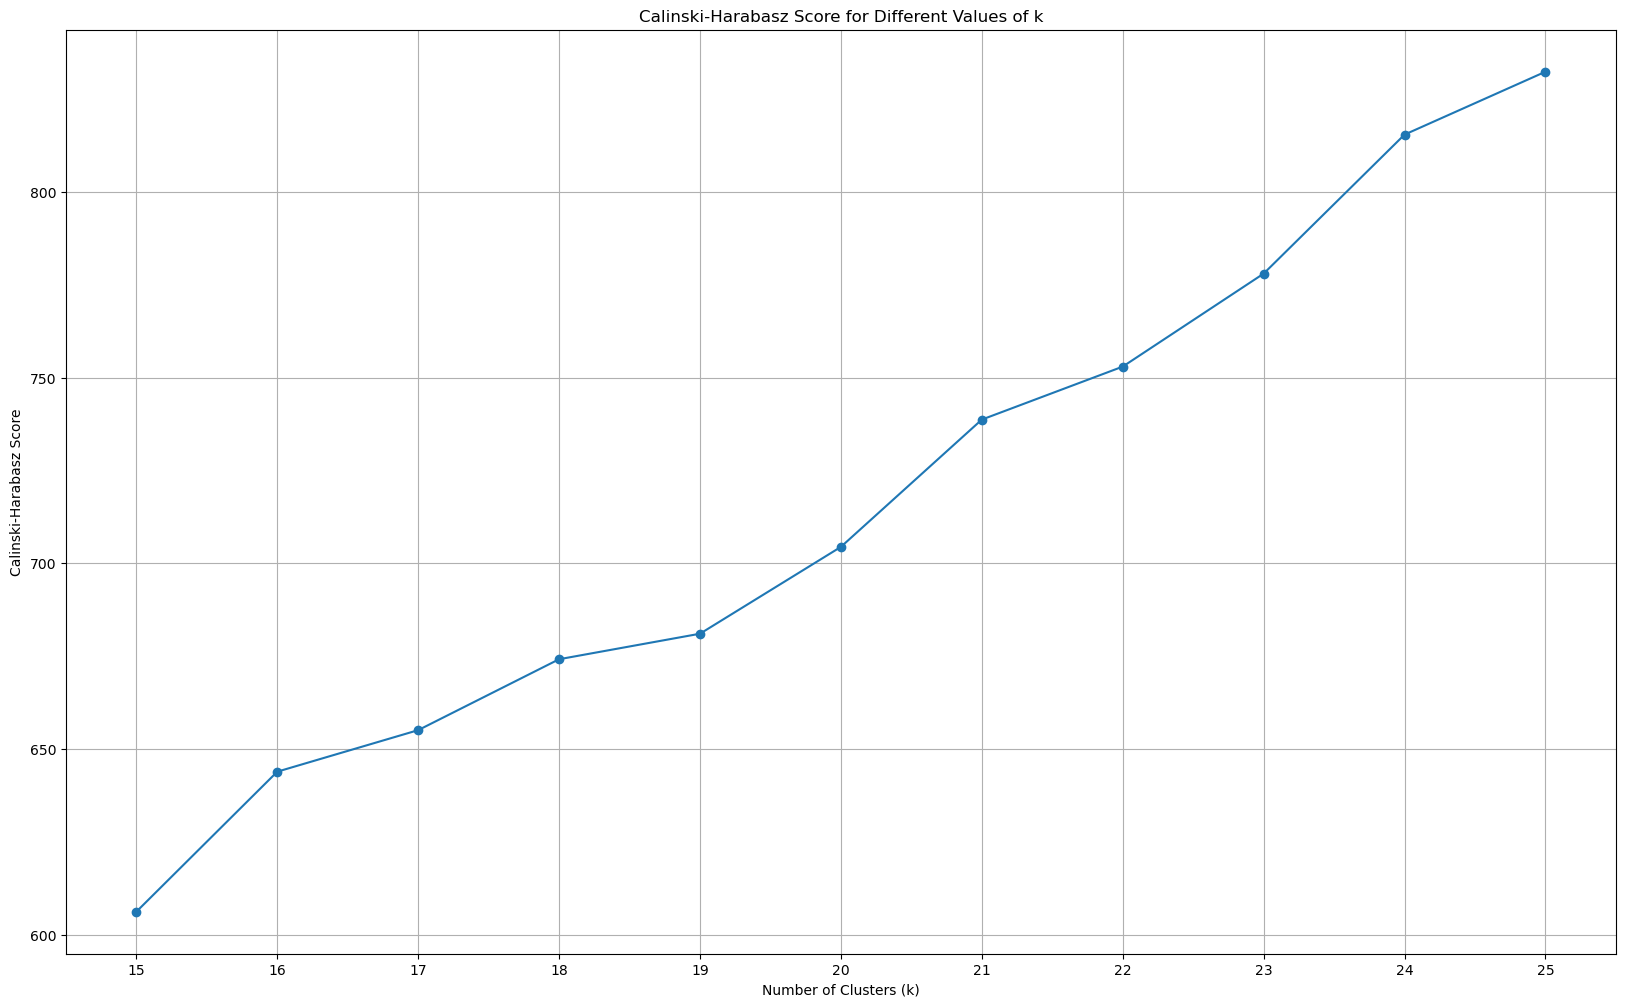

In [7]:
plt.figure(figsize=(20, 12))
plt.plot(k_values, ch_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Score for Different Values of k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [8]:
k = k_values[np.argmax(ch_scores)]
k

25

In [9]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

C:\Users\mipo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mipo\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


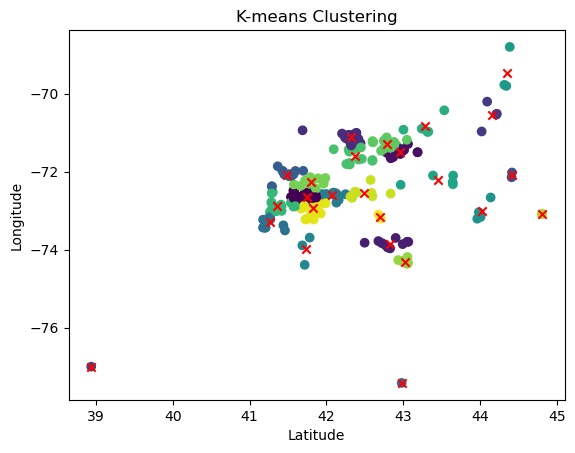

In [10]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.title('K-means Clustering')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [11]:
print("Cluster Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i+1}: Latitude = {centroid[0]}, Longitude = {centroid[1]}")

Cluster Centroids:
Cluster 1: Latitude = 41.74652418, Longitude = -72.65130868
Cluster 2: Latitude = 42.95796566666667, Longitude = -71.4844590952381
Cluster 3: Latitude = 42.82656936363637, Longitude = -73.84541409090909
Cluster 4: Latitude = 42.318191, Longitude = -71.10415952380953
Cluster 5: Latitude = 44.1517714, Longitude = -70.5487028
Cluster 6: Latitude = 38.93933, Longitude = -77.00285
Cluster 7: Latitude = 44.41368249999999, Longitude = -72.08146350000001
Cluster 8: Latitude = 41.49035788235294, Longitude = -72.08216388235294
Cluster 9: Latitude = 42.980585, Longitude = -77.420032
Cluster 10: Latitude = 41.266388375, Longitude = -73.2784211875
Cluster 11: Latitude = 42.07908364, Longitude = -72.59799632
Cluster 12: Latitude = 41.72961433333333, Longitude = -73.990225
Cluster 13: Latitude = 44.02374925, Longitude = -73.017498
Cluster 14: Latitude = 44.348439, Longitude = -69.45575533333333
Cluster 15: Latitude = 43.4592328, Longitude = -72.2233584
Cluster 16: Latitude = 43.284

In [12]:
cluster_centroids_df = pd.DataFrame(centroids, columns=X.columns)
cluster_centroids_df

,Latitude,Longitude
0,41.746524,-72.651309
1,42.957966,-71.484459
2,42.826569,-73.845414
3,42.318191,-71.104160
4,44.151771,-70.548703
5,38.939330,-77.002850
6,44.413682,-72.081464
7,41.490358,-72.082164
8,42.980585,-77.420032
9,41.266388,-73.278421


In [14]:
cluster_counts = pd.Series(labels).value_counts().sort_index()
cluster_centroids_df['Location Count'] = cluster_counts.values
cluster_centroids_df

,Latitude,Longitude,Location Count
0,41.746524,-72.651309,50
1,42.957966,-71.484459,21
2,42.826569,-73.845414,11
3,42.318191,-71.104160,63
4,44.151771,-70.548703,5
5,38.939330,-77.002850,1
6,44.413682,-72.081464,2
7,41.490358,-72.082164,17
8,42.980585,-77.420032,1
9,41.266388,-73.278421,16


In [15]:
data['Cluster'] = labels
data

,Sold To ID,Sold To Customer,Ship To ID,Ship To Customer,Ship To Address,Ship To City,Ship To State,Ship To Zip,Full Address,Latitude,...,GP PY TTD,GP Var,GP % Diff,Revenue CY,Revenue PY TTD,Revenue Var,Revenue % Diff,Total Orders,Avg. GP per Order,Cluster
0,290799,213 COURT STREET REALTY TRUST,290799,213 COURT STREET REALTY TRUST,213 Court St,Middletown,CT,6457,"213 Court St Middletown, CT 06457",41.559080,...,"$6,027","$9,334",154.87%,"$55,521","$17,442","$38,079",218.32%,5,$937.98,0
1,295245,A CLEAR VIEW WINDOW CLN RESALE,295245,A CLEAR VIEW WINDOW CLN RESALE,37 BURNHAM ST,Enfield,CT,6082,"37 BURNHAM ST Enfield, CT 06082",41.942955,...,"$7,099",($372),-5.25%,"$22,896","$20,648","$2,248",10.89%,9,$225.12,10
2,287838,ACCUTRON INC,287838,ACCUTRON INC,149 Addison Rd,Windsor,CT,6095,"149 Addison Rd Windsor, CT 06095",41.867201,...,$344,$361,104.73%,"$2,029","$1,499",$530,35.39%,4,$67.70,0
3,287972,ADELBROOK HOME OF CROMWELL,444038,ADELBROOK,60 Hicksville Rd,Cromwell,CT,6416,"60 Hicksville Rd Cromwell, CT 06416",41.600599,...,"$8,917","$1,352",15.16%,"$45,497","$40,289","$5,209",12.93%,4,$373.57,0
4,290623,PAC SERVICES,460021,AERO GEAR INC,1050 Day Hill Rd,Windsor,CT,6095,"1050 Day Hill Rd Windsor, CT 06095",41.881027,...,"$3,275","$1,245",38.02%,"$15,642","$12,403","$3,239",26.12%,10,$161.14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,251379,SALEM SCHOOL DISTRICT SAU 57,424254,WOODBURY MIDDLE SCHOOL,206 Main St,Salem,NH,3079,"206 Main St Salem, NH 03079",42.782811,...,"$3,248","$26,924",829.08%,"$99,175","$8,664","$90,511",1044.71%,18,$238.95,18
356,292934,TEWKSBURY SCHOOL DEPARTMENT,450615,WYNN MIDDLE SCHOOL,1 Griffin Way,Tewksbury,MA,1876,"1 Griffin Way Tewksbury, MA 01876",42.601190,...,"$9,326","($5,170)",-55.44%,"$14,978","$32,447","($17,469)",-53.84%,4,$329.47,18
357,287510,YALE NEW HAVEN HOSPITAL,443166,YALE NEW HAVEN HOSPITAL,726 Howard Ave,New Haven,CT,6519,"726 Howard Ave New Haven, CT 06519",41.301140,...,"$3,431",($308),-8.97%,"$9,486","$11,171","($1,685)",-15.08%,14,$55.02,16
358,291693,YALE UNIV FACILITIES PROCUREME,291693,YALE UNIV FACILITIES PROCUREME,344 Winchester Ave,New Haven,CT,6511,"344 Winchester Ave New Haven, CT 06511",41.324842,...,"$15,477","$14,674",94.81%,"$109,184","$52,502","$56,681",107.96%,5,$740.53,16


In [16]:
cluster_centroids_df.to_csv("1470_cluster_centroids_25.csv", index=False)
data.to_csv("1470_custered_stops_25.csv", index=False)